<a href="https://colab.research.google.com/github/kelly1325/Python/blob/main/KellyG_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Predicting Median House Price in Boston


In this project, we are going to model the median home price of various houses across U.S. Census tracts in the city of Boston. Note that we are predicting a continuous, numeric output (price) based on a combination of discrete features. Thus, this is a regression project.

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
% matplotlib inline

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [ ]:
# loading the data
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1. Clean Up Data and Perform Exporatory Data Analysis


Boston data is from scikit-learn datasets library. Thus, it should be in clean format. Nevertheless, we should always perform exploratory data analysis before we start our analysis in detail.



In [ ]:
# Exploratory data analysis:
# Includes: total nulls, data types, shape, summary statistics, and the number of unique values for each column in the dataset.
# Plots to describe any relationships between different columns.

def Analysis():
  import numpy as np
  import pandas as pd 
  from sklearn.datasets import load_boston
  boston= load_boston()
  X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
  y = pd.DataFrame(boston.target,
                 columns=['MEDV'])
  data=np.c_[boston.data,boston.target]
  columns=np.append(boston.feature_names,["target"])
  return pd.DataFrame(data,columns=columns)

df=Analysis()
df

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...     ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67    22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08    20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64    23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48    22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88    11.9

[506 rows x 14 columns]

In [ ]:
#Total nulls
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [ ]:
#data types
df.dtypes 

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [ ]:
#Shape
print ("Boston House Prices Dataset has {} data points with {} variables each.".format(*df.shape))

Boston House Prices Dataset has 506 data points with 14 variables each.


In [ ]:
#Summary statistics
df.describe()

CRIM          ZN       INDUS  ...           B       LSTAT      target
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

In [ ]:
#Number of unique values for each column in the dataset
UniqueValues = df.nunique()
print('Number of Unique Values for Each Column in the Dataset :')
print(UniqueValues)

Number of Unique Values for Each Column in the Dataset :
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
target     229
dtype: int64


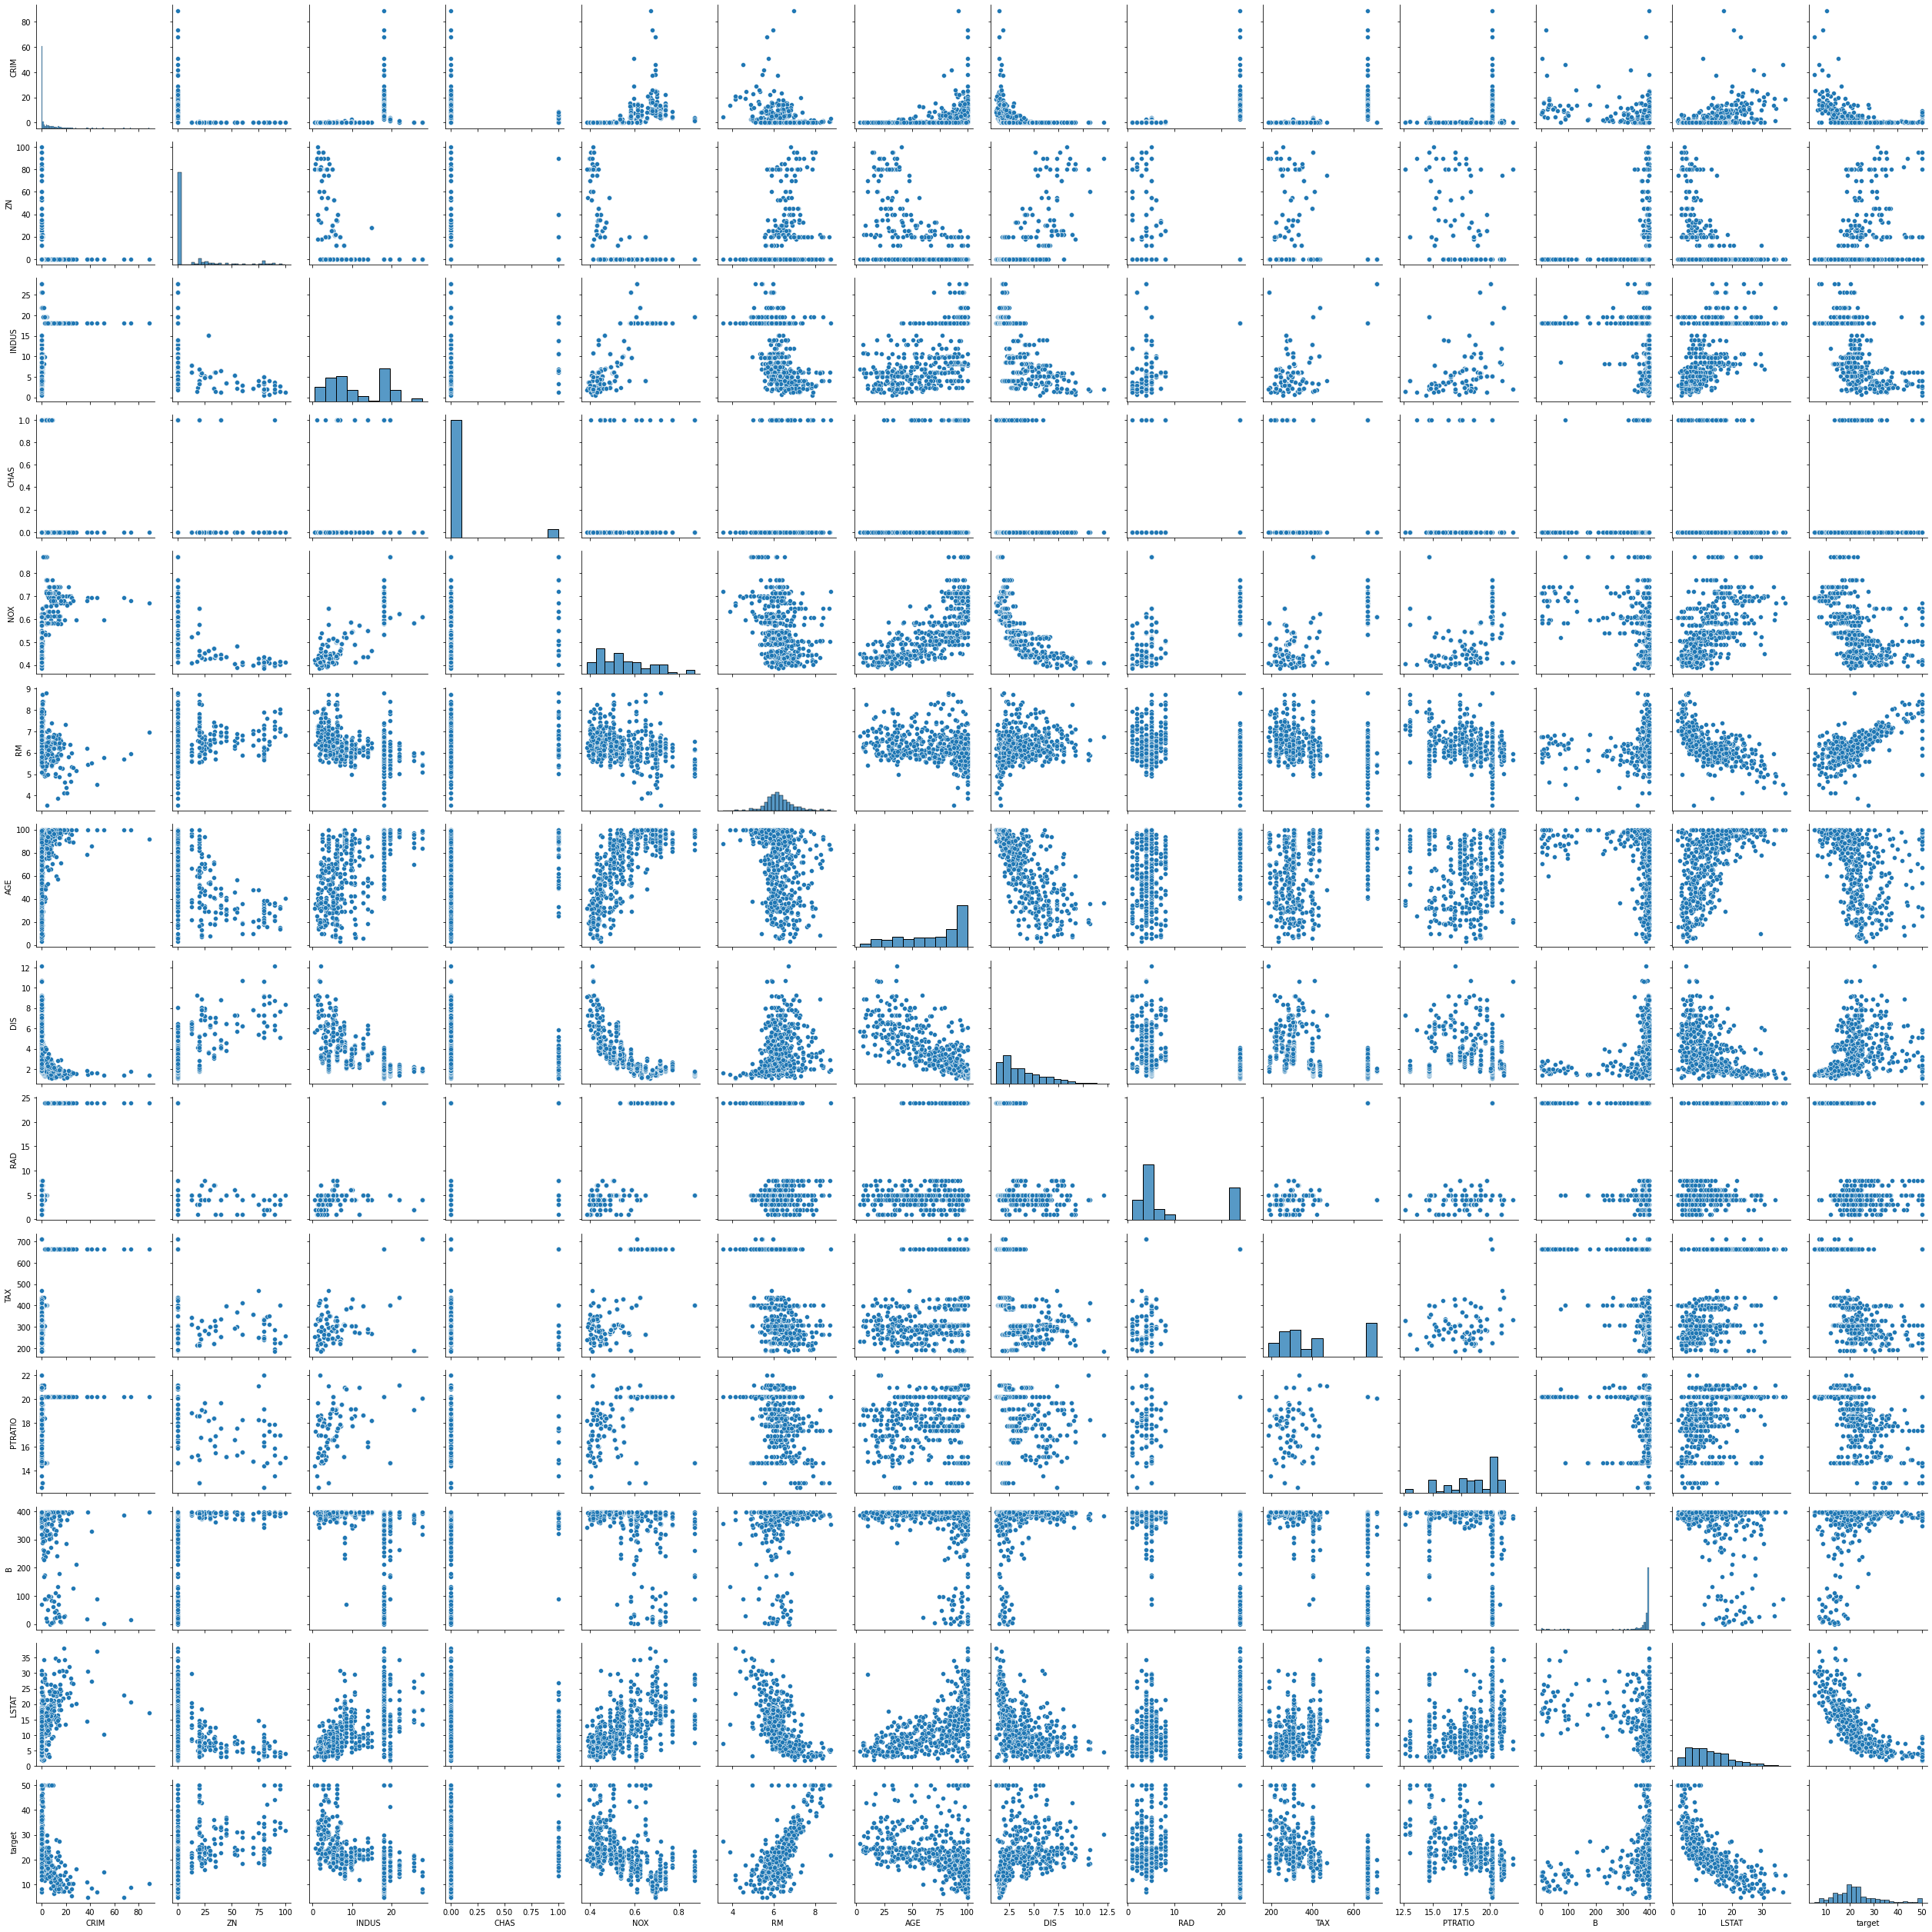

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.pairplot(df, height=2.5)
plt.tight_layout()

In [ ]:
#The lower the 'target'(Median value of owner-occupied homes in $1000's)the higher LSTAT (% lower status of the population)
#There seems to be a linear relationship(strong correlation) between ‘RM’ (average number of rooms per dwelling)and ‘Target’ (Median value of owner-occupied homes in $1000's). 
#We can infer from the histogram that the ‘Target’ variable seems to be normally distributed but contains some outliers.

## 2. Build a Lasso regression model using Scikit-Learn

Use the toolset in Scikit-Learn to build a Lasso regression model to predict our target variable, MEDV. Use a 10-fold cross validation in building your model. Score your predictions. What do these results tell us?


In [ ]:
# Lasso regression model with 10-fold cross-validation

import pandas as pd
from sklearn.datasets import load_boston
Boston = load_boston()

X = Boston.data
y = Boston.target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
#The feature matrix is two dimensional and the target array is one dimensional

In [ ]:
#Setting up training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

print("X training set dimensions:", X_train.shape)
print("Y training set dimensions:", Y_train.shape)
print("X testing set dimensions: ", X_test.shape)
print("Y testing set dimensions: ", Y_test.shape)

X training set dimensions: (379, 13)
Y training set dimensions: (379, 1)
X testing set dimensions:  (127, 13)
Y testing set dimensions:  (127, 1)


In [ ]:
#linear regression model to be able to compare our result to the Lasso regression model

#standard boiler plate imports

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#various components of the regression line:

print("Regression model:   y =", linear_reg.coef_[0], "x +", linear_reg.intercept_)
print('Model slope:      ', linear_reg.coef_[0])
print('Model intercept:  ', linear_reg.intercept_)

In [ ]:
#determining the training set and test set scores
#these scores are the equivalance of the R-squared, or the 'Coefficient of Determination' in statistics
lrtrR2 = linear_reg.score(X_train,Y_train)
lrteR2 = linear_reg.score(X_test, Y_test)

print('The R-square of the training set is:', lrtrR2)
print('The R-square of the testing set is:', lrteR2)
print('The number of features out of 10 used under Linear Regression is:', np.sum(linear_reg.coef_ !=0))

The R-square of the training set is: 0.7697699488741149
The R-square of the testing set is: 0.635463843320211
The number of features out of 10 used under Linear Regression is: 13


In [ ]:
#Scikit-Learn to build a Lasso regression model for alpha=1
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train,Y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
#Determining the training set score and test set score
lassotrR2 =  lasso.score(X_train,Y_train)
lassoteR2 = lasso.score(X_test, Y_test)

print('The R-square of the Lasso training set with alpha=1 is:', lassotrR2)
print('The R-square of the Lasso testing set with alpha=1 is:', lassoteR2)
print('The number of features out of 10 used in this Lasso regression is:', np.sum(lasso.coef_ !=0))

The R-square of the Lasso training set with alpha=1 is: 0.7150499874336981
The R-square of the Lasso testing set with alpha=1 is: 0.5516247059049908
The number of features out of 10 used in this Lasso regression is: 11


In [ ]:
#using GridSearchCV to identify the optimal alpha 
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gslasso = GridSearchCV(estimator=lasso,param_grid=parameters)
gslasso = gslasso.fit(X_train,Y_train)
gslasso.best_params_ 

{'alpha': 0.001}

In [ ]:
#fit the lasso model with the best parameter alpha and find the scores of the train and test sets
lb = Lasso(alpha=0.001).fit(X_train,Y_train)
lbtrR2 = lb.score(X_train,Y_train)
lbteR2 = lb.score(X_test, Y_test)

print('The R-squares of the Lasso regressions with Optimized Alpha = 0.001:')
print('Training Set Score: {:.2f}'.format(lbtrR2))
print('Testing Set Score: {:.2f}'.format(lbteR2))
print('The number of features out of 10 used: ', np.sum(lb.coef_ !=0))

The R-squares of the Lasso regressions with Optimized Alpha = 0.001:
Training Set Score: 0.77
Testing Set Score: 0.64
The number of features out of 10 used:  13


In [ ]:
#The number of features using the linear regression model is 13 vs. 11 features used in the Lasso regression model. 
#However, the lasso regression with the optimized alpha=0.001 performed almost exactly as well as the normal linear regression. 

## 3. Build a Random forest regression model using Scikit-Learn

Using the toolset in Scikit-Learn to build a Random forest regression model to predict our target variable, MEDV. Used a 10-fold cross validation in building the model and scored our predictions. 

In [ ]:
# Random forest regression model with 10-fold cross-validation

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.datasets import load_boston

# define dataset
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X_train, y_train = make_regression(n_features=13, n_informative=2, random_state=0, shuffle=False)

# define & fit the model
regr = RandomForestRegressor(max_depth= 2, random_state=0)
regr.fit(X_train, y_train)
RandomForestRegressor(...)

#print(regr.predict([[]]))
print(regr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[0.88688965]


In [ ]:
#Score the date using ranom forest 
from sklearn import metrics
regr.score(X_test,y_test)

-10.389367812690859

In [ ]:
# Evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_test,y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -3.298 (1.228)


## 4. Build a Support Vector Machine (SVM) model using Scikit-Learn

Use the toolset in Scikit-Learn to build a Support Vector Machine (SVM) regression model to predict our target variable, MEDV. Use a 10-fold cross validation in building your model. Score your predictions. What do these results tell us?

In [ ]:
# Support Vector Machine (SVM) regression model with 10-fold cross-validation
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

# define dataset
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

#Split data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

In [ ]:
n_samples, n_features = 10, 13
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
from sklearn.pipeline import Pipeline
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
#Fit the model
svrmodel = SVR(kernel='rbf')
svrmodel.fit(X_train,y_train)

In [ ]:
#Prediction
Y_pred=svrmodel.predict(X_test)
Y_pred

array([20.45556572, 15.35319417, 22.69366198, 15.60342184, 20.61500198,
       22.68287389, 16.17098271, 24.24560202, 22.51492708, 16.71117878,
       13.13180889, 13.15801718, 14.85340619, 15.49839021, 19.88567442,
       22.95748555, 16.11458925, 23.60108215, 23.27322038, 23.50069321,
       23.18610339, 19.33783966, 20.41782757, 24.61262636, 24.43958504,
       13.40243515, 22.08002444, 18.2254303 , 23.07569211, 19.28504466,
       15.47006367, 15.83473007, 21.90370455, 23.04526149, 22.48614395,
       15.32765698, 15.5076468 , 15.29520128, 13.3552764 , 14.64786612,
       23.62306613, 24.41520228, 20.12689984, 15.20831035, 20.10600486,
       23.61938694, 22.96741977, 19.00795603, 19.72552357, 20.62159456,
       16.49116477, 21.20343377, 22.31218239, 23.27702064, 17.49321343,
       22.93210405, 23.57736236, 21.43873439, 13.1971936 , 22.62467649,
       21.73662527, 22.67755762, 23.23644628, 23.12196151, 16.16544047,
       21.61440942, 15.2154839 , 22.02546078, 13.61546573, 23.78

In [ ]:
#Model Evaluation 
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
rmse

8.652239526194208

In [ ]:
#Obtain the Accuracy Score of the Model on Test Data
from sklearn import metrics
svrmodel.score(X_test,y_test)

0.08369460247143334